In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# COST COMPARISON (VARYING VM)

In [221]:
df_cost_vm=pd.read_excel("cost vs vm 2.xlsx")

In [223]:
df_cost_vm

,No of VMs,RR,SJF,FWA,SQSA,BAT,PSO,BMO,SSA
0,10,326.134301,325.055427,305.999589,308.243038,313.967940,316.306597,308.527742,309.106937
1,15,469.203217,470.027151,440.749030,442.265115,448.529936,451.757597,444.996194,438.609238
2,20,521.887581,537.192201,471.518600,470.558280,477.285336,492.576291,483.640668,469.892662
3,25,514.367841,520.495522,436.748135,444.982467,444.579982,483.590251,460.975608,452.151844
4,30,554.735821,557.707577,457.091269,471.076755,467.106928,507.733480,492.710554,485.973747
5,35,561.387477,563.086056,444.342425,467.850121,443.784262,514.195227,490.930837,475.622897
6,40,589.026509,586.415565,458.135727,481.232031,468.696792,524.026545,508.955408,494.651855


In [225]:
costs=[]

In [227]:
for i in range(len(df_cost_vm)):
    row=df_cost_vm.iloc[i]
    row_tuple=[(row[col],col) for col in df_cost_vm.columns]
    
    vm=row_tuple[0][0]
    print("No of VMs: ",int(vm))
    
    row_tuple=row_tuple[1:]
    row_tuple.sort()
    print(row_tuple)
    
    average_traditional=(row_tuple[-1][0]+row_tuple[-2][0])/2
    print("Average Traditional: ",average_traditional)
    
    average_meta=0
    for j in range(6):
        average_meta+=row_tuple[j][0]
    average_meta/=6
    
    print("Average Metaheuristic: ",average_meta)
    
    slowest_percentage_meta_lower=(average_traditional-row_tuple[-3][0])/average_traditional*100
    print("Slowest meta heuristic is lower in %: ", round(slowest_percentage_meta_lower,2))
    
    average_percentage_meta_lower=(average_traditional-average_meta)/average_traditional*100
    print("Average meta heuristic is lower in %: ", round(average_percentage_meta_lower,2))
    
    fastest_percentage_meta_lower=(average_traditional-row_tuple[0][0])/average_traditional*100
    print("Fastest meta heuristic is lower in %: ", round(fastest_percentage_meta_lower,2))
    
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-3])
    costs.append((vm,average_traditional,average_meta,slowest_percentage_meta_lower,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1],row_tuple[-3][1]))
    print()

No of VMs:  10
[(305.999589, 'FWA'), (308.243038, 'SQSA'), (308.527742, 'BMO'), (309.106937, 'SSA'), (313.96794, 'BAT'), (316.306597, 'PSO'), (325.055427, 'SJF'), (326.134301, 'RR')]
Average Traditional:  325.59486400000003
Average Metaheuristic:  310.35864050000004
Slowest meta heuristic is lower in %:  2.85
Average meta heuristic is lower in %:  4.68
Fastest meta heuristic is lower in %:  6.02
Best allocation algorithm:  (305.999589, 'FWA')
Worst allocation algorithm:  (316.306597, 'PSO')

No of VMs:  15
[(438.609238, 'SSA'), (440.74903, 'FWA'), (442.265115, 'SQSA'), (444.996194, 'BMO'), (448.529936, 'BAT'), (451.757597, 'PSO'), (469.203217, 'RR'), (470.027151, 'SJF')]
Average Traditional:  469.615184
Average Metaheuristic:  444.48451833333326
Slowest meta heuristic is lower in %:  3.8
Average meta heuristic is lower in %:  5.35
Fastest meta heuristic is lower in %:  6.6
Best allocation algorithm:  (438.609238, 'SSA')
Worst allocation algorithm:  (451.757597, 'PSO')

No of VMs:  20
[

In [229]:
costs_df=pd.DataFrame(costs,columns=["No of VMs","Average Traditional","Average Metaheuristic","Slowest meta heuristic is lower in %",
                            "Average meta heuristic is lower in %", "Fastest meta heuristic is lower in %", 
                            "Best allocation","Worst allocation"])
costs_df

,No of VMs,Average Traditional,Average Metaheuristic,Slowest meta heuristic is lower in %,Average meta heuristic is lower in %,Fastest meta heuristic is lower in %,Best allocation,Worst allocation
0,10.0,325.594864,310.358641,2.852707,4.679504,6.018300,FWA,PSO
1,15.0,469.615184,444.484518,3.802600,5.351332,6.602416,SSA,PSO
2,20.0,529.539891,477.578639,6.980324,9.812528,11.263973,SSA,PSO
3,25.0,517.431681,453.838048,6.540270,12.290247,15.593082,FWA,PSO
4,30.0,556.221699,480.282122,8.717427,13.652753,17.822108,FWA,PSO
5,35.0,562.236766,472.787628,8.544717,15.909514,21.068082,BAT,PSO
6,40.0,587.721037,489.283060,10.837538,16.749099,22.048779,FWA,PSO


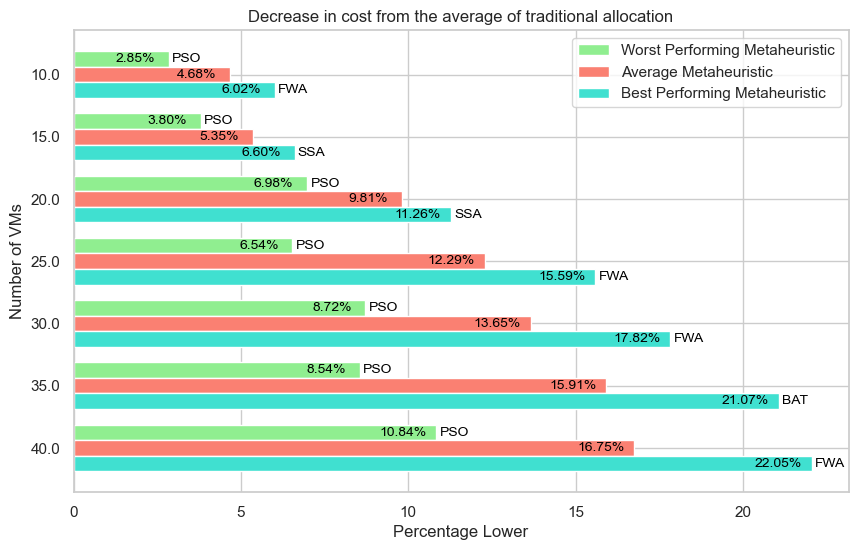

In [231]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(costs_df))

bars3 = ax.barh(index, costs_df["Slowest meta heuristic is lower in %"], color='lightgreen', height=bar_width, label="Worst Performing Metaheuristic")
bars1 = ax.barh(index + bar_width, costs_df["Average meta heuristic is lower in %"], color='salmon', height=bar_width, label="Average Metaheuristic")
bars2 = ax.barh(index + 2*bar_width, costs_df["Fastest meta heuristic is lower in %"], color='turquoise', height=bar_width, label="Best Performing Metaheuristic")

ax.set_yticks(index + bar_width)
ax.set_yticklabels(costs_df["No of VMs"]) 
ax.set_xlabel("Percentage Lower")
ax.set_ylabel("Number of VMs")
ax.set_title("Decrease in cost from the average of traditional allocation")

ax.legend()
ax.invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)

for bar, algo in zip(bars2, costs_df["Best allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

for bar, algo in zip(bars3, costs_df["Worst allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

plt.savefig("cost_decrease_perc.png", bbox_inches='tight') 
plt.show()

## Among metaheuristics->

In [17]:
df_cost_vm_meta=df_cost_vm.drop(["SJF","RR"],axis=1)
df_cost_vm_meta

,No of VMs,FWA,SQSA,BAT,PSO,BMO,SSA
0,10,305.999589,308.243038,313.967940,316.306597,308.527742,309.106937
1,15,440.749030,442.265115,448.529936,451.757597,444.996194,438.609238
2,20,471.518600,470.558280,477.285336,492.576291,483.640668,469.892662
3,25,436.748135,444.982467,444.579982,483.590251,460.975608,452.151844
4,30,457.091269,471.076755,467.106928,507.733480,492.710554,485.973747
5,35,444.342425,467.850121,443.784262,514.195227,490.930837,475.622897
6,40,458.135727,481.232031,468.696792,524.026545,508.955408,494.651855


In [21]:
for i in range(len(df_cost_vm_meta)):
    row=df_cost_vm_meta.iloc[i]
    row_tuple=[(row[col],col) for col in df_cost_vm_meta.columns]
    vm=row_tuple[0][0]
    print("No of VMs: ",int(vm))
    row_tuple=row_tuple[1:]
    row_tuple.sort()
    print(row_tuple)
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-1])
    fastest_slowest_perc=(row_tuple[-1][0]-row_tuple[0][0])/row_tuple[-1][0]*100
    print("Best metaheuristic is lower than worst in %: ", fastest_slowest_perc)
    # costs.append((vm,average_traditional,average_meta,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1]))
    
    print()

No of VMs:  10
[(305.999589, 'FWA'), (308.243038, 'SQSA'), (308.527742, 'BMO'), (309.106937, 'SSA'), (313.96794, 'BAT'), (316.306597, 'PSO')]
Best allocation algorithm:  (305.999589, 'FWA')
Worst allocation algorithm:  (316.306597, 'PSO')
Best metaheuristic is lower than worst in %:  3.2585498050804156

No of VMs:  15
[(438.609238, 'SSA'), (440.74903, 'FWA'), (442.265115, 'SQSA'), (444.996194, 'BMO'), (448.529936, 'BAT'), (451.757597, 'PSO')]
Best allocation algorithm:  (438.609238, 'SSA')
Worst allocation algorithm:  (451.757597, 'PSO')
Best metaheuristic is lower than worst in %:  2.910489848386539

No of VMs:  20
[(469.892662, 'SSA'), (470.55828, 'SQSA'), (471.5186, 'FWA'), (477.285336, 'BAT'), (483.640668, 'BMO'), (492.576291, 'PSO')]
Best allocation algorithm:  (469.892662, 'SSA')
Worst allocation algorithm:  (492.576291, 'PSO')
Best metaheuristic is lower than worst in %:  4.60509963927599

No of VMs:  25
[(436.748135, 'FWA'), (444.579982, 'BAT'), (444.982467, 'SQSA'), (452.15184

# ENERGY COMPARISON (VARYING VM)

In [233]:
df_energy_vm=pd.read_excel("energy vs vm 2.xlsx")

In [235]:
df_energy_vm

,No of VMs,RR,SJF,FWA,SQSA,BAT,PSO,BMO,SSA
0,10,1.690669,1.681327,1.539971,1.542770,1.592983,1.602920,1.541886,1.538309
1,15,2.713577,2.737240,2.492727,2.437267,2.564152,2.542549,2.480072,2.441914
2,20,2.865236,3.015303,2.482737,2.293156,2.492973,2.574584,2.464807,2.350688
3,25,2.881187,2.973211,2.181896,2.154178,2.304066,2.587685,2.324047,2.203588
4,30,3.431461,3.463336,2.452345,2.404746,2.589216,2.868654,2.707426,2.638588
5,35,3.450209,3.462311,2.306849,2.357581,2.314211,2.928384,2.607616,2.466589
6,40,3.725988,3.693244,2.386503,2.437955,2.534019,2.960306,2.788281,2.604782


In [237]:
energies=[]

In [239]:
for i in range(len(df_energy_vm)):
    row=df_energy_vm.iloc[i]
    row_tuple=[(row[col],col) for col in df_energy_vm.columns]
    
    vm=row_tuple[0][0]
    print("No of VMs: ",int(vm))
    
    row_tuple=row_tuple[1:]
    row_tuple.sort()
    print(row_tuple)
    
    average_traditional=(row_tuple[-1][0]+row_tuple[-2][0])/2
    print("Average Traditional: ",average_traditional)
    
    average_meta=0
    for j in range(6):
        average_meta+=row_tuple[j][0]
    average_meta/=6
    
    print("Average Metaheuristic: ",average_meta)
    
    slowest_percentage_meta_lower=(average_traditional-row_tuple[-3][0])/average_traditional*100
    print("Slowest meta heuristic is lower in %: ", round(slowest_percentage_meta_lower,2))
    
    average_percentage_meta_lower=(average_traditional-average_meta)/average_traditional*100
    print("Average meta heuristic is lower in %: ", round(average_percentage_meta_lower,2))
    
    fastest_percentage_meta_lower=(average_traditional-row_tuple[0][0])/average_traditional*100
    print("Fastest meta heuristic is lower in %: ", round(fastest_percentage_meta_lower,2))
    
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-3])
    energies.append((vm,average_traditional,average_meta,slowest_percentage_meta_lower,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1],row_tuple[-3][1]))
    print()

No of VMs:  10
[(1.538309, 'SSA'), (1.539971, 'FWA'), (1.541886, 'BMO'), (1.54277, 'SQSA'), (1.592983, 'BAT'), (1.60292, 'PSO'), (1.681327, 'SJF'), (1.690669, 'RR')]
Average Traditional:  1.685998
Average Metaheuristic:  1.5598064999999999
Slowest meta heuristic is lower in %:  4.93
Average meta heuristic is lower in %:  7.48
Fastest meta heuristic is lower in %:  8.76
Best allocation algorithm:  (1.538309, 'SSA')
Worst allocation algorithm:  (1.60292, 'PSO')

No of VMs:  15
[(2.437267, 'SQSA'), (2.441914, 'SSA'), (2.480072, 'BMO'), (2.492727, 'FWA'), (2.542549, 'PSO'), (2.564152, 'BAT'), (2.713577, 'RR'), (2.73724, 'SJF')]
Average Traditional:  2.7254085
Average Metaheuristic:  2.4931134999999998
Slowest meta heuristic is lower in %:  5.92
Average meta heuristic is lower in %:  8.52
Fastest meta heuristic is lower in %:  10.57
Best allocation algorithm:  (2.437267, 'SQSA')
Worst allocation algorithm:  (2.564152, 'BAT')

No of VMs:  20
[(2.293156, 'SQSA'), (2.350688, 'SSA'), (2.464807,

In [241]:
energies_df=pd.DataFrame(energies,columns=["No of VMs","Average Traditional","Average Metaheuristic","Slowest meta heuristic is lower in %",
                            "Average meta heuristic is lower in %", "Fastest meta heuristic is lower in %", 
                            "Best allocation","Worst allocation"])
energies_df

,No of VMs,Average Traditional,Average Metaheuristic,Slowest meta heuristic is lower in %,Average meta heuristic is lower in %,Fastest meta heuristic is lower in %,Best allocation,Worst allocation
0,10.0,1.685998,1.559806,4.927527,7.484677,8.759738,SSA,PSO
1,15.0,2.725408,2.493113,5.916783,8.523309,10.572415,SQSA,BAT
2,20.0,2.940269,2.443158,12.437142,16.907022,22.008646,SQSA,PSO
3,25.0,2.927199,2.292577,11.598596,21.680191,26.408215,SQSA,PSO
4,30.0,3.447399,2.610162,16.787862,24.286023,30.244618,SQSA,PSO
5,35.0,3.456260,2.496872,15.273041,27.757991,33.255918,FWA,PSO
6,40.0,3.709616,2.618641,20.199126,29.409378,35.667115,FWA,PSO


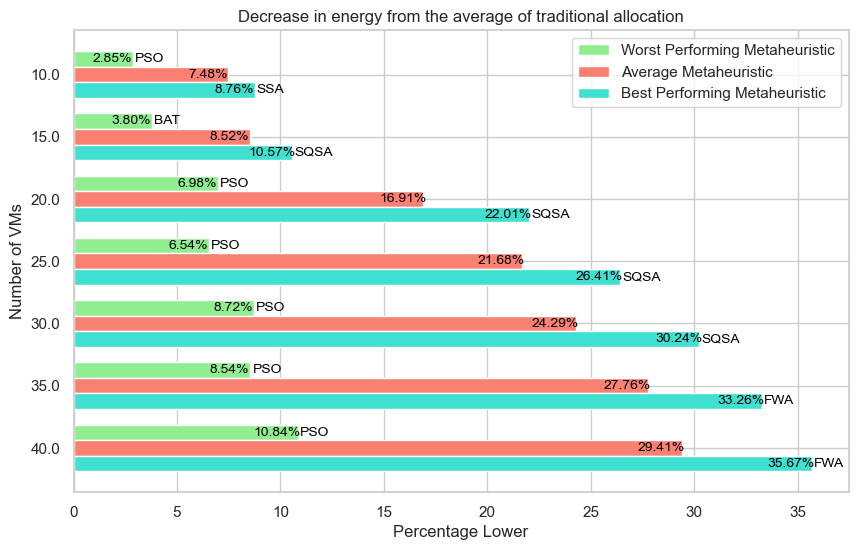

In [245]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

index = np.arange(len(energies_df))

bars3 = ax.barh(index, costs_df["Slowest meta heuristic is lower in %"], color='lightgreen', height=bar_width, label="Worst Performing Metaheuristic")
bars1 = ax.barh(index + bar_width, energies_df["Average meta heuristic is lower in %"], color='salmon', height=bar_width, label="Average Metaheuristic")
bars2 = ax.barh(index + 2*bar_width, energies_df["Fastest meta heuristic is lower in %"], color='turquoise', height=bar_width, label="Best Performing Metaheuristic")

ax.set_yticks(index + bar_width)
ax.set_yticklabels(energies_df["No of VMs"]) 
ax.set_xlabel("Percentage Lower")
ax.set_ylabel("Number of VMs")
ax.set_title("Decrease in energy from the average of traditional allocation")

ax.legend()

ax.invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)

for bar, algo in zip(bars2, energies_df["Best allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

for bar, algo in zip(bars3, energies_df["Worst allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

plt.savefig("energies_decrease_perc.png", bbox_inches='tight') 
plt.show()

# COST COMPARISON (VARYING TASK)

In [250]:
df_cost_task=pd.read_excel("cost vs task 2.xlsx")

In [252]:
df_cost_task

,No of Tasks,RR,SJF,FWA,SQSA,BAT,PSO,BMO,SSA
0,40,221.864169,222.761101,181.307046,172.153725,186.156727,198.402897,188.848631,183.965532
1,50,270.011023,270.357121,208.241274,209.479435,220.202021,237.145815,229.112199,213.419658
2,60,360.430813,360.938926,284.503415,287.227962,283.444481,318.860432,302.487126,290.436742
3,70,410.707769,411.856553,339.624416,334.002407,352.340518,373.893731,358.706109,337.592163
4,100,573.587505,573.233991,461.384704,483.394960,468.268521,520.994189,503.206992,490.611581
5,150,773.910720,781.438072,669.669981,695.876084,675.685703,730.470104,712.962478,706.197953


In [262]:
costs=[]

In [264]:
for i in range(len(df_cost_task)):
    row=df_cost_task.iloc[i]
    row_tuple=[(row[col],col) for col in df_cost_task.columns]
    
    task=row_tuple[0][0]
    print("No of Tasks: ",int(task))
    
    row_tuple=row_tuple[1:]
    row_tuple.sort()
    print(row_tuple)
    
    average_traditional=(row_tuple[-1][0]+row_tuple[-2][0])/2
    print("Average Traditional: ",average_traditional)
    
    average_meta=0
    for j in range(6):
        average_meta+=row_tuple[j][0]
    average_meta/=6
    
    print("Average Metaheuristic: ",average_meta)
    
    slowest_percentage_meta_lower=(average_traditional-row_tuple[-3][0])/average_traditional*100
    print("Slowest meta heuristic is lower in %: ", round(slowest_percentage_meta_lower,2))
    
    average_percentage_meta_lower=(average_traditional-average_meta)/average_traditional*100
    print("Average meta heuristic is lower in %: ", round(average_percentage_meta_lower,2))
    
    fastest_percentage_meta_lower=(average_traditional-row_tuple[0][0])/average_traditional*100
    print("Fastest meta heuristic is lower in %: ", round(fastest_percentage_meta_lower,2))
    
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-3])
    costs.append((task,average_traditional,average_meta,slowest_percentage_meta_lower,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1],row_tuple[-3][1]))
    print()

No of Tasks:  40
[(172.153725, 'SQSA'), (181.307046, 'FWA'), (183.965532, 'SSA'), (186.156727, 'BAT'), (188.848631, 'BMO'), (198.402897, 'PSO'), (221.864169, 'RR'), (222.761101, 'SJF')]
Average Traditional:  222.312635
Average Metaheuristic:  185.139093
Slowest meta heuristic is lower in %:  10.76
Average meta heuristic is lower in %:  16.72
Fastest meta heuristic is lower in %:  22.56
Best allocation algorithm:  (172.153725, 'SQSA')
Worst allocation algorithm:  (198.402897, 'PSO')

No of Tasks:  50
[(208.241274, 'FWA'), (209.479435, 'SQSA'), (213.419658, 'SSA'), (220.202021, 'BAT'), (229.112199, 'BMO'), (237.145815, 'PSO'), (270.011023, 'RR'), (270.357121, 'SJF')]
Average Traditional:  270.184072
Average Metaheuristic:  219.600067
Slowest meta heuristic is lower in %:  12.23
Average meta heuristic is lower in %:  18.72
Fastest meta heuristic is lower in %:  22.93
Best allocation algorithm:  (208.241274, 'FWA')
Worst allocation algorithm:  (237.145815, 'PSO')

No of Tasks:  60
[(283.44

In [266]:
costs_df=pd.DataFrame(costs,columns=["No of Tasks","Average Traditional","Average Metaheuristic","Slowest meta heuristic is lower in %",
                            "Average meta heuristic is lower in %", "Fastest meta heuristic is lower in %", 
                            "Best allocation","Worst allocation"])
costs_df

,No of Tasks,Average Traditional,Average Metaheuristic,Slowest meta heuristic is lower in %,Average meta heuristic is lower in %,Fastest meta heuristic is lower in %,Best allocation,Worst allocation
0,40.0,222.312635,185.139093,10.755006,16.721291,22.562330,SQSA,PSO
1,50.0,270.184072,219.600067,12.228055,18.722053,22.926147,FWA,PSO
2,60.0,360.684869,294.493360,11.595839,18.351618,21.414923,BAT,PSO
3,70.0,411.282161,349.359891,9.090701,15.055910,18.789960,SQSA,PSO
4,100.0,573.410748,487.976825,9.141189,14.899254,19.536788,FWA,PSO
5,150.0,777.674396,698.477051,6.069930,10.183869,13.888128,FWA,PSO


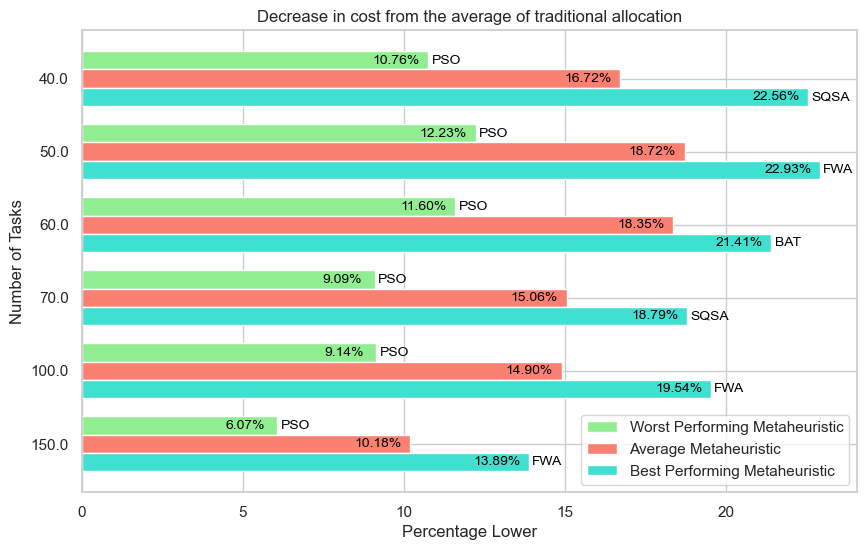

In [274]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25

index = np.arange(len(costs_df))

bars3 = ax.barh(index, costs_df["Slowest meta heuristic is lower in %"], color='lightgreen', height=bar_width, label="Worst Performing Metaheuristic")
bars1 = ax.barh(index + bar_width, costs_df["Average meta heuristic is lower in %"], color='salmon', height=bar_width, label="Average Metaheuristic")
bars2 = ax.barh(index + 2*bar_width, costs_df["Fastest meta heuristic is lower in %"], color='turquoise', height=bar_width, label="Best Performing Metaheuristic")

ax.set_yticks(index + bar_width)
ax.set_yticklabels(costs_df["No of Tasks"]) 
ax.set_xlabel("Percentage Lower")
ax.set_ylabel("Number of Tasks")
ax.set_title("Decrease in cost from the average of traditional allocation")

ax.legend()

ax.invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)

for bar, algo in zip(bars2, costs_df["Best allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

for bar, algo in zip(bars3, costs_df["Worst allocation"]):
    width = bar.get_width()
    ax.text(width - 1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

plt.savefig("cost_decrease_perc_task.png", bbox_inches='tight') 
plt.show()

# ENERGY COMPARISON (VARYING TASK)

In [277]:
df_energy_task=pd.read_excel("energy vs task 2.xlsx")

In [279]:
df_energy_task

,No of Tasks,RR,SJF,FWA,SQSA,BAT,PSO,BMO,SSA
0,40,1.628516,1.654265,1.001985,0.954076,1.050232,1.283493,1.094436,1.004018
1,50,1.793789,1.838367,1.316821,1.087307,1.395130,1.433944,1.291075,1.258292
2,60,2.372618,2.380703,1.594865,1.506329,1.543471,1.879251,1.689366,1.588725
3,70,2.502110,2.494817,1.850538,1.594127,1.956910,2.071446,1.907841,1.707665
4,100,3.356497,3.432659,2.798496,2.672749,2.873112,2.974152,2.873852,2.795056
5,150,3.528709,3.535136,3.264491,3.287681,3.396261,3.410273,3.313241,3.285107


In [281]:
energies=[]

In [283]:
for i in range(len(df_energy_task)):
    row=df_energy_task.iloc[i]
    row_tuple=[(row[col],col) for col in df_energy_task.columns]
    
    task=row_tuple[0][0]
    print("No of Tasks: ",int(task))
    
    row_tuple=row_tuple[1:]
    row_tuple.sort()
    print(row_tuple)
    
    average_traditional=(row_tuple[-1][0]+row_tuple[-2][0])/2
    print("Average Traditional: ",average_traditional)
    
    average_meta=0
    for j in range(6):
        average_meta+=row_tuple[j][0]
    average_meta/=6
    
    print("Average Metaheuristic: ",average_meta)
    
    slowest_percentage_meta_lower=(average_traditional-row_tuple[-3][0])/average_traditional*100
    print("Slowest meta heuristic is lower in %: ", round(slowest_percentage_meta_lower,2))
    
    average_percentage_meta_lower=(average_traditional-average_meta)/average_traditional*100
    print("Average meta heuristic is lower in %: ", round(average_percentage_meta_lower,2))
    
    fastest_percentage_meta_lower=(average_traditional-row_tuple[0][0])/average_traditional*100
    print("Fastest meta heuristic is lower in %: ", round(fastest_percentage_meta_lower,2))
    
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-3])
    energies.append((task,average_traditional,average_meta,slowest_percentage_meta_lower,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1],row_tuple[-3][1]))
    print()

No of Tasks:  40
[(0.954076, 'SQSA'), (1.001985, 'FWA'), (1.004018, 'SSA'), (1.050232, 'BAT'), (1.094436, 'BMO'), (1.283493, 'PSO'), (1.628516, 'RR'), (1.654265, 'SJF')]
Average Traditional:  1.6413905
Average Metaheuristic:  1.0647066666666667
Slowest meta heuristic is lower in %:  21.8
Average meta heuristic is lower in %:  35.13
Fastest meta heuristic is lower in %:  41.87
Best allocation algorithm:  (0.954076, 'SQSA')
Worst allocation algorithm:  (1.283493, 'PSO')

No of Tasks:  50
[(1.087307, 'SQSA'), (1.258292, 'SSA'), (1.291075, 'BMO'), (1.316821, 'FWA'), (1.39513, 'BAT'), (1.433944, 'PSO'), (1.793789, 'RR'), (1.838367, 'SJF')]
Average Traditional:  1.816078
Average Metaheuristic:  1.2970948333333334
Slowest meta heuristic is lower in %:  21.04
Average meta heuristic is lower in %:  28.58
Fastest meta heuristic is lower in %:  40.13
Best allocation algorithm:  (1.087307, 'SQSA')
Worst allocation algorithm:  (1.433944, 'PSO')

No of Tasks:  60
[(1.506329, 'SQSA'), (1.543471, 'BAT

In [285]:
energies_df=pd.DataFrame(energies,columns=["No of Tasks","Average Traditional","Average Metaheuristic","Slowest meta heuristic is lower in %",
                            "Average meta heuristic is lower in %", "Fastest meta heuristic is lower in %", 
                            "Best allocation","Worst allocation"])
energies_df

,No of Tasks,Average Traditional,Average Metaheuristic,Slowest meta heuristic is lower in %,Average meta heuristic is lower in %,Fastest meta heuristic is lower in %,Best allocation,Worst allocation
0,40.0,1.641390,1.064707,21.804531,35.133860,41.873917,SQSA,PSO
1,50.0,1.816078,1.297095,21.041717,28.577141,40.128838,SQSA,PSO
2,60.0,2.376660,1.633668,20.928925,31.262045,36.619934,SQSA,PSO
3,70.0,2.498463,1.848088,17.091204,26.031025,36.195706,SQSA,PSO
4,100.0,3.394578,2.831236,12.385221,16.595342,21.264175,SQSA,PSO
5,150.0,3.531923,3.326176,3.444286,5.825350,7.571839,FWA,PSO


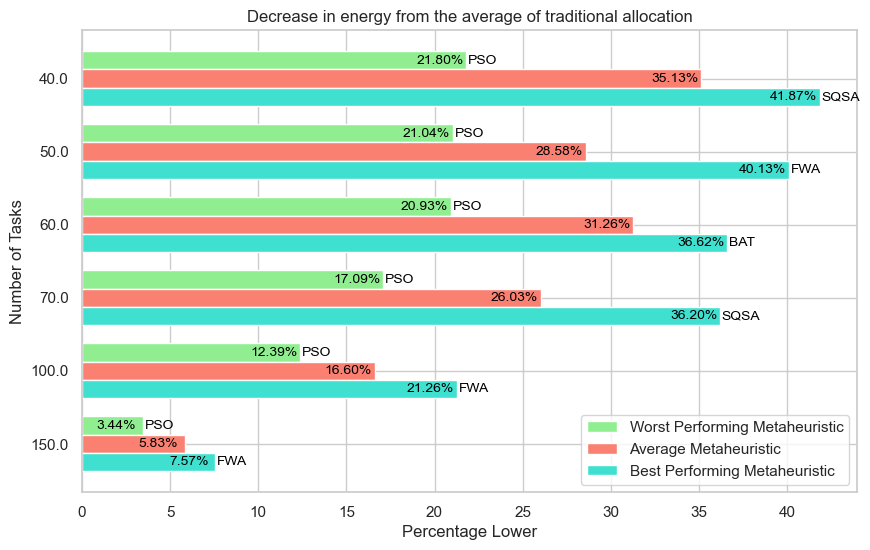

In [301]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

index = np.arange(len(energies_df))

bars3 = ax.barh(index, energies_df["Slowest meta heuristic is lower in %"], color='lightgreen', height=bar_width, label="Worst Performing Metaheuristic")
bars1 = ax.barh(index + bar_width, energies_df["Average meta heuristic is lower in %"], color='salmon', height=bar_width, label="Average Metaheuristic")
bars2 = ax.barh(index + 2*bar_width, energies_df["Fastest meta heuristic is lower in %"], color='turquoise', height=bar_width, label="Best Performing Metaheuristic")


ax.set_yticks(index + bar_width)
ax.set_yticklabels(energies_df["No of Tasks"])  
ax.set_xlabel("Percentage Lower")
ax.set_ylabel("Number of Tasks")
ax.set_title("Decrease in energy from the average of traditional allocation")

ax.legend()

ax.invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)

for bar, algo in zip(bars2, costs_df["Best allocation"]):
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

for bar, algo in zip(bars3, costs_df["Worst allocation"]):
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

plt.savefig("energies_decrease_perc_task.png", bbox_inches='tight') 
plt.show()

# MAKESPAN COMPARISON

In [304]:
df_makespan=pd.read_excel("makespan vs computing.xlsx")

In [306]:
df_makespan

,max task CPU,max task memory,RR,SJF,FWA,SQSA,BAT,PSO,BMO,SSA
0,100,100,85.490122,84.712605,64.153695,60.737885,70.179464,70.136827,67.990053,67.547998
1,150,150,152.441602,146.423700,105.128693,110.324668,119.189744,125.975898,120.808843,109.755718
2,200,200,201.181418,206.954041,156.689402,146.590138,161.141215,174.944137,169.800495,161.308764
3,250,250,249.285277,253.365512,176.883314,171.879438,184.671580,211.003155,189.368258,183.500985
4,300,300,327.037005,325.801085,228.848153,220.253475,264.054259,276.591812,252.501458,250.740588
5,350,350,381.424806,389.457666,290.779569,271.066942,335.313309,337.059332,306.361796,307.925110


In [314]:
makespans=[]

In [316]:
for i in range(len(df_makespan)):
    row=df_makespan.iloc[i]
    row_tuple=[(row[col],col) for col in df_makespan.columns]
    
    cpu=row_tuple[0][0]
    memory=row_tuple[1][0]
    print("Max CPU: ",int(cpu))
    
    row_tuple=row_tuple[2:]
    row_tuple.sort()
    print(row_tuple)
    
    average_traditional=(row_tuple[-1][0]+row_tuple[-2][0])/2
    print("Average Traditional: ",average_traditional)
    
    average_meta=0
    for j in range(6):
        average_meta+=row_tuple[j][0]
    average_meta/=6
    
    print("Average Metaheuristic: ",average_meta)
    
    slowest_percentage_meta_lower=(average_traditional-row_tuple[-3][0])/average_traditional*100
    print("Slowest meta heuristic is lower in %: ", round(slowest_percentage_meta_lower,2))
    
    average_percentage_meta_lower=(average_traditional-average_meta)/average_traditional*100
    print("Average meta heuristic is lower in %: ", round(average_percentage_meta_lower,2))
    
    fastest_percentage_meta_lower=(average_traditional-row_tuple[0][0])/average_traditional*100
    print("Fastest meta heuristic is lower in %: ", round(fastest_percentage_meta_lower,2))
    
    print("Best allocation algorithm: ", row_tuple[0])
    print("Worst allocation algorithm: ", row_tuple[-3])
    makespans.append((cpu,memory,average_traditional,average_meta,slowest_percentage_meta_lower,average_percentage_meta_lower,fastest_percentage_meta_lower,row_tuple[0][1],row_tuple[-3][1]))
    print()

Max CPU:  100
[(60.737885, 'SQSA'), (64.153695, 'FWA'), (67.547998, 'SSA'), (67.990053, 'BMO'), (70.136827, 'PSO'), (70.179464, 'BAT'), (84.712605, 'SJF'), (85.490122, 'RR')]
Average Traditional:  85.10136349999999
Average Metaheuristic:  66.790987
Slowest meta heuristic is lower in %:  17.53
Average meta heuristic is lower in %:  21.52
Fastest meta heuristic is lower in %:  28.63
Best allocation algorithm:  (60.737885, 'SQSA')
Worst allocation algorithm:  (70.179464, 'BAT')

Max CPU:  150
[(105.128693, 'FWA'), (109.755718, 'SSA'), (110.324668, 'SQSA'), (119.189744, 'BAT'), (120.808843, 'BMO'), (125.975898, 'PSO'), (146.4237, 'SJF'), (152.441602, 'RR')]
Average Traditional:  149.432651
Average Metaheuristic:  115.19726066666668
Slowest meta heuristic is lower in %:  15.7
Average meta heuristic is lower in %:  22.91
Fastest meta heuristic is lower in %:  29.65
Best allocation algorithm:  (105.128693, 'FWA')
Worst allocation algorithm:  (125.975898, 'PSO')

Max CPU:  200
[(146.590138, 'S

In [322]:
makespans_df=pd.DataFrame(makespans,columns=["Max CPU","Max Memory","Average Traditional","Average Metaheuristic","Slowest meta heuristic is lower in %",
                            "Average meta heuristic is lower in %", "Fastest meta heuristic is lower in %", 
                            "Best allocation","Worst allocation"])
makespans_df

,Max CPU,Max Memory,Average Traditional,Average Metaheuristic,Slowest meta heuristic is lower in %,Average meta heuristic is lower in %,Fastest meta heuristic is lower in %,Best allocation,Worst allocation
0,100.0,100.0,85.101363,66.790987,17.534266,21.515961,28.628776,SQSA,BAT
1,150.0,150.0,149.432651,115.197261,15.697207,22.910248,29.648111,FWA,PSO
2,200.0,200.0,204.067729,161.745692,14.271533,20.739211,28.165939,SQSA,PSO
3,250.0,250.0,251.325395,186.217788,16.043838,25.905701,31.610796,SQSA,PSO
4,300.0,300.0,326.419045,248.831624,15.264806,23.769269,32.524319,SQSA,PSO
5,350.0,350.0,385.441236,308.084343,12.552342,20.069698,29.673601,SQSA,PSO


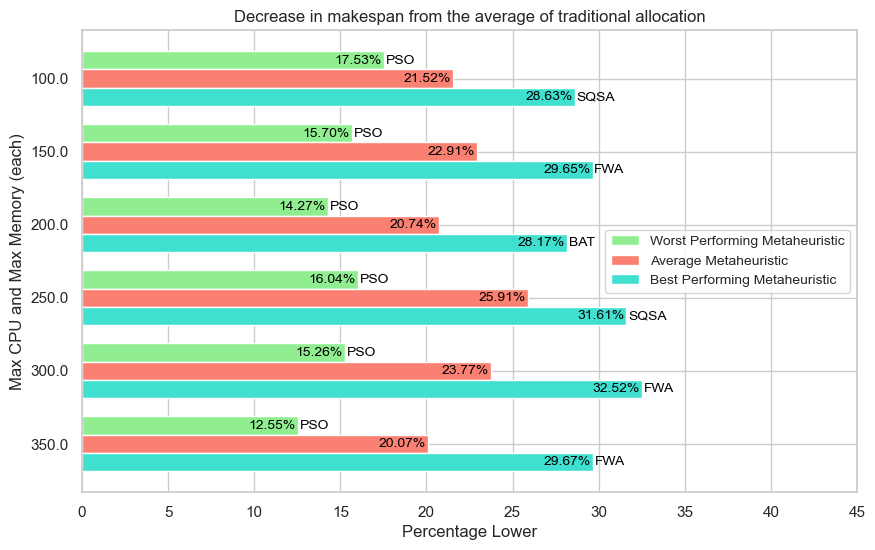

In [362]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25

index = np.arange(len(makespans_df))

bars3 = ax.barh(index, makespans_df["Slowest meta heuristic is lower in %"], color='lightgreen', height=bar_width, label="Worst Performing Metaheuristic")
bars1 = ax.barh(index + bar_width, makespans_df["Average meta heuristic is lower in %"], color='salmon', height=bar_width, label="Average Metaheuristic")
bars2 = ax.barh(index + 2*bar_width, makespans_df["Fastest meta heuristic is lower in %"], color='turquoise', height=bar_width, label="Best Performing Metaheuristic")


ax.set_yticks(index + bar_width)
ax.set_yticklabels(makespans_df["Max CPU"])  
ax.set_xlabel("Percentage Lower")
ax.set_ylabel("Max CPU and Max Memory (each)")
ax.set_title("Decrease in makespan from the average of traditional allocation")
ax.set_xlim(0,45)

ax.legend(fontsize='small', loc='center right')

ax.invert_yaxis()

for bar in bars1:
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)

for bar, algo in zip(bars2, costs_df["Best allocation"]):
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

for bar, algo in zip(bars3, costs_df["Worst allocation"]):
    width = bar.get_width()
    ax.text(width - 1.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
            ha='center', va='center', color='black', fontsize=10)
    ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, algo, 
            ha='left', va='center', color='black', fontsize=10)

plt.savefig("makespan_decrease_perc.png", bbox_inches='tight') 
plt.show()